## Using Geopandas to make raster mask

In [11]:
import rasterio
import geopandas as gpd
from shapely.geometry import box, Point
import matplotlib.pyplot as plt

from pyproj import CRS

import cartopy.crs as ccrs

import rioxarray
import xarray as xr
import numpy as np

from ros_database.processing.surface import load_station_metadata
from nsidc_projections.grid import IMS4km, IMS1km

geom = [shape for shape in coastline.geometries()]

In [3]:
def get_clip_box(this_point, resolution, nx, ny):
    px, py = point_gdf[location].x, point_gdf[location].y
    pcol, prow = ~dummy.rio.transform() * (px, py)
    gcol, grow = np.round(pcol), np.round(prow)
    gx, gy = dummy.rio.transform() * (gcol, grow)
    dx, dy = resolution
    clip_box = [gx-(dx*nx), gy-(dy*ny), gx+(dx*nx), gy+(dy*ny)] 
    return clip_box

In [62]:
ls /media/apbarret/andypbarrett_work/Data/IMS_Daily_NorthernHemisphere_Snow/original/

1km/  4km/


In [53]:
filepath = "/home/apbarret/Data/GSHHG/GSHHS_shp/f/GSHHS_f_L1.shp"
gdf = gpd.read_file(filepath)
gdf.head()

,id,level,source,parent_id,sibling_id,area,geometry
0,0-E,1,WVS,-1,-1,5.065405e+07,"POLYGON ((180 68.99378, 180 65.03378, 179.9983..."
1,0-W,1,WVS,-1,-1,5.065405e+07,"POLYGON ((-180 68.99378, -179.99844 68.99292, ..."
2,1,1,WVS,-1,-1,2.922097e+07,"POLYGON ((32.28292 31.2325, 32.2845 31.23281, ..."
3,2,1,WVS,-1,-1,2.015474e+07,"POLYGON ((-79.92628 9.31236, -79.92538 9.3124,..."
4,3,1,WVS,-1,-1,1.753416e+07,"POLYGON ((-73.36172 -53.00042, -73.36261 -53, ..."


In [54]:
len(gdf)

179837

<Axes: >

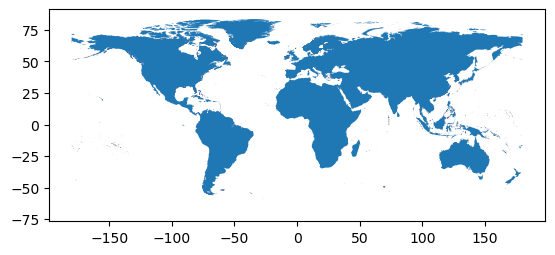

In [55]:
gdf.plot()

In [56]:
gdf.set_crs(4326, inplace=True)

,id,level,source,parent_id,sibling_id,area,geometry
0,0-E,1,WVS,-1,-1,5.065405e+07,"POLYGON ((180 68.99378, 180 65.03378, 179.9983..."
1,0-W,1,WVS,-1,-1,5.065405e+07,"POLYGON ((-180 68.99378, -179.99844 68.99292, ..."
2,1,1,WVS,-1,-1,2.922097e+07,"POLYGON ((32.28292 31.2325, 32.2845 31.23281, ..."
3,2,1,WVS,-1,-1,2.015474e+07,"POLYGON ((-79.92628 9.31236, -79.92538 9.3124,..."
4,3,1,WVS,-1,-1,1.753416e+07,"POLYGON ((-73.36172 -53.00042, -73.36261 -53, ..."
...,...,...,...,...,...,...,...
179832,180501,1,WVS,-1,-1,5.542000e-04,"POLYGON ((-110.90125 78.73847, -110.89747 78.7..."
179833,180502,1,WVS,-1,-1,4.431505e-04,"POLYGON ((-105.70242 77.44856, -105.704 77.449..."
179834,180503,1,WVS,-1,-1,4.010580e-04,"POLYGON ((-79.96336 56.787, -79.96358 56.78694..."
179835,180504,1,WVS,-1,-1,2.612870e-04,"POLYGON ((-79.63522 56.86672, -79.63533 56.866..."


In [8]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

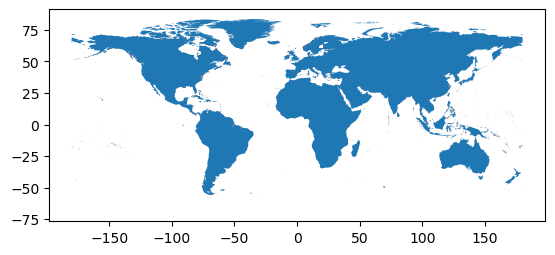

In [24]:
ax = gdf.plot()

In [10]:
gdf.total_bounds

array([-180.      ,  -68.924526,  180.      ,   83.633389])

## Check all stations inside coast polygon

In [13]:
stations = load_station_metadata()
stations.head()

,station_name,latitude,longitude,elevation,record_begins,iem_network,state,country,climate_site,wfo,tzname,ncdc81,ncei91,ugc_county,ugc_zone,county,network,start_year,end_year,geometry
stid,,,,,,,,,,,,,,,,,,,,
PALP,Alpine,70.34430,-150.94470,7.998743,2005-03-01 00:00,AK_ASOS,AK,US,AK3275,AFG,America/Anchorage,USC00502126,USC00500235,AKC185,AKZ203,North Slope,AK_ASOS,2005,2022,POINT (-150.9447 70.3443)
PAFM,AMBLER,67.10631,-157.85747,88.000000,1988-01-05 00:00,AK_ASOS,AK,US,AKTAKN,AFG,America/Anchorage,USC00503212,USC00503212,AKC188,AKZ217,Northwest Arctic,AK_ASOS,1988,2022,POINT (-157.85747 67.10631)
PAKP,ANAKTUVUK PASS,68.13360,-151.74334,643.000000,1980-09-11 00:00,AK_ASOS,AK,US,AK3275,AFG,America/Anchorage,USW00026533,USW00026533,AKC185,AKZ206,Yukon-koyukuk,AK_ASOS,1980,2022,POINT (-151.74334 68.1336)
PANC,ANCHORAGE INTL ARPT (ASOS),61.16972,-150.02611,40.000000,1953-11-01 00:00,AK_ASOS,AK,US,AKTANC,AFC,America/Anchorage,USW00026451,USW00026451,AKC020,AKZ101,Kenai Peninsula,AK_ASOS,1953,2022,POINT (-150.02611 61.16972)
PANV,ANVIK AIRPORT,62.64733,-160.19007,99.000000,1994-12-31 00:00,AK_ASOS,AK,US,AKTAKN,AFG,America/Anchorage,USW00026502,USW00026502,AKC290,AKZ215,Yukon-koyukuk,AK_ASOS,1994,2022,POINT (-160.19007 62.64733)


Stations not contained by coastline polygon

In [23]:
res = stations.sjoin(gdf, predicate='within', how='left')
res[res["index_right"].isna()]

,station_name,latitude,longitude,elevation,record_begins,iem_network,state,country,climate_site,wfo,...,start_year,end_year,geometry,index_right,id,level,source,parent_id,sibling_id,area
stid,,,,,,,,,,,,,,,,,,,,,
CWEU,EUREKA,79.98333,-85.93333,10.0,1947-05-01 00:00,CA_NU_ASOS,NU,CA,NaN,NaN,...,1947,2022,POINT (-85.93333 79.98333),NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYDP,NAIN AIRPORT,56.54920,-61.68030,7.0,1984-09-21 00:00,CA_NF_ASOS,NF,CA,NaN,NaN,...,1984,2022,POINT (-61.6803 56.5492),NaN,NaN,NaN,NaN,NaN,NaN,NaN


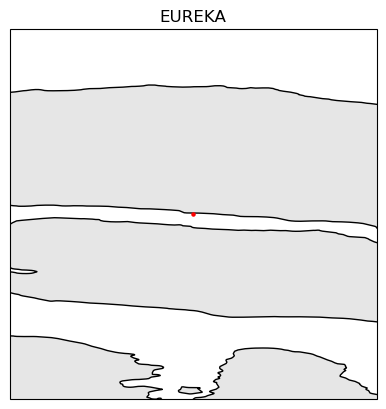

In [64]:
stid = "CWEU"

dlon, dlat = 0.5, 0.5

lat, lon = stations.loc[stid, ['latitude','longitude']]

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon-dlon, lon+dlon, lat-dlat, lat+dlat], ccrs.PlateCarree())
ax.set_title(stations.loc[stid, 'station_name'])

gdf.plot(ax=ax, color='0.9', edgecolor='k')

ax.scatter(lon, lat, s=5, c='red', marker='o', transform=ccrs.PlateCarree())
# stations.loc['CWEU'].plot(ax=ax, marker='o', color='red', markersize=5)

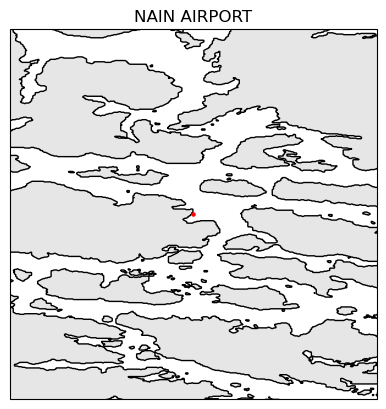

In [59]:
stid = "CYDP"

dlon, dlat = 0.25, 0.25

lat, lon = stations.loc[stid, ['latitude','longitude']]

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon-dlon, lon+dlon, lat-dlat, lat+dlat], ccrs.PlateCarree())
ax.set_title(stations.loc[stid, 'station_name'])

gdf.plot(ax=ax, color='0.9', edgecolor='k')

ax.scatter(lon, lat, s=5, c='red', marker='o', transform=ccrs.PlateCarree())


## Reproject to NSIDC WGS84 North Polar Stereographic: EPSG:3413

In [65]:
# Create a custom polygon
polygon = box(-180, 50, 180, 90)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf.crs)

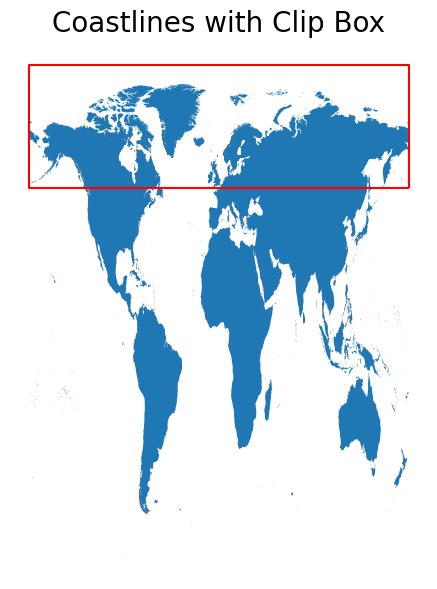

In [67]:
fig, ax = plt.subplots(figsize=(12, 7))
gdf.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("Coastlines with Clip Box", fontsize=20)
ax.set_axis_off()

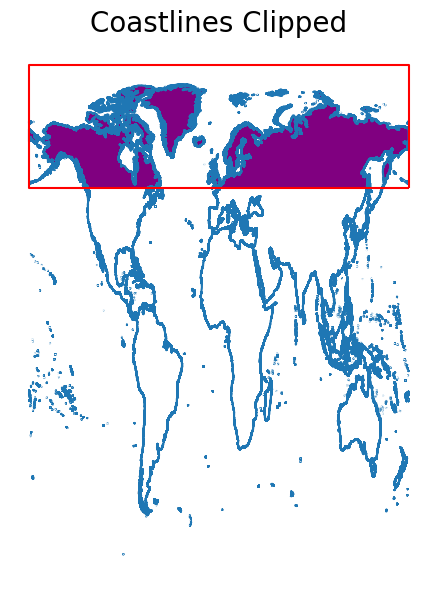

In [68]:
coastlines_clipped = gdf.clip(poly_gdf)

fig, ax = plt.subplots(figsize=(12, 7))
coastlines_clipped.plot(ax=ax, color="purple")
gdf.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("Coastlines Clipped", fontsize=20)
ax.set_axis_off()

## Add a `land` attribute

In [69]:
coastlines_clipped["land"] = 1

### Define a grid for testing purposes

Assume 25000 m by 25000 m cells.  This is roughly a 950 x 950 grid.  Assume center column and row is (475,475).

In [70]:
x, y = IMS4km.get_coordinates()
dummy = xr.DataArray(np.zeros((IMS4km.cols, IMS4km.rows), dtype="byte"), dims=["y", "x"], coords={"x": x, "y": y})

In [71]:
dummy.rio.set_crs(IMS4km.crs)

<xarray.DataArray (y: 6144, x: 6144)> Size: 38MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)
Coordinates:
  * x        (x) float64 49kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
  * y        (y) float64 49kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07

In [76]:
from notebooks.utils import plot_ims_snow_and_ice, get_extent

test_point = {
    "Norton Sound": (-163.01706271914878, 64.54757445721512),
    "Cambridge Bay": (-105.05586791647777, 69.11608384685066),
    "Clyde River": (-68.59767446082255, 70.47531698648856),
    "Tiksi": (128.76156219329152, 71.70659836968615),
}

point_gdf = gpd.GeoSeries([Point(*p) for p in test_point.values()], index=test_point.keys(), crs=4326).to_crs(IMS4km.crs)
point_gdf

Norton Sound     POINT (-2675522.217 -327704.066)
Cambridge Bay    POINT (-931739.106 -1993044.857)
Clyde River       POINT (406089.334 -2013556.873)
Tiksi             POINT (-924969.111 1685189.537)
dtype: geometry

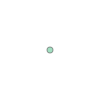

In [77]:
location = "Norton Sound"
point_gdf.loc[location]

In [78]:
bounds = get_clip_box(point_gdf.loc[location], dummy.rio.resolution(), 20, 20)

In [79]:
dummy_clip = dummy.rio.clip_box(*get_clip_box(point_gdf.loc[location], dummy.rio.resolution(), 20, 20))

In [80]:
from geocube.api.core import make_geocube

In [81]:
%%time
raster_coastlines = make_geocube(coastlines_clipped,
                                 measurements=["land"],
                                 fill = 0, 
                                 #resolution=(4000.,4000.),
                                 like=dummy_clip,
                                 #interpolate_na_method="nearest",
                                )
raster_coastlines

CPU times: user 4.97 s, sys: 299 ms, total: 5.27 s
Wall time: 5.3 s


<xarray.Dataset> Size: 13kB
Dimensions:      (y: 40, x: 40)
Coordinates:
  * y            (y) float64 320B -4.06e+05 -4.02e+05 ... -2.54e+05 -2.5e+05
  * x            (x) float64 320B -2.754e+06 -2.75e+06 ... -2.602e+06 -2.598e+06
    spatial_ref  int64 8B 0
Data variables:
    land         (y, x) int64 13kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1

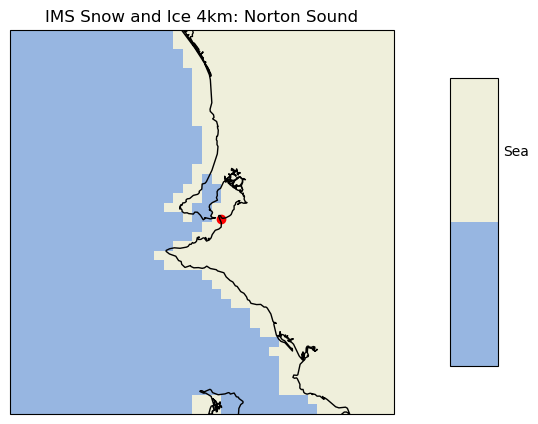

In [82]:
from notebooks.utils import LAND_MASK_CMAP, LAND_MASK_NORM
extent = [bounds[i] for i in [0, 2, 1, 3]]  #get_extent(test_point[location], raster_coastlines, fov=200000.)
ax = plot_ims_snow_and_ice(raster_coastlines.land, 
                           title=f"IMS Snow and Ice 4km: {location}", 
                           extent=extent,
                           cmap=LAND_MASK_CMAP, 
                           norm=LAND_MASK_NORM)
ax.scatter(*test_point[location], 
           marker='o', 
           color="red", 
           transform=ccrs.PlateCarree())